In [1]:
from pyarrow.parquet import ParquetFile
from torch.utils.data import *
import pyarrow as pa
import pyarrow.parquet as pq
import glob,os,re,time
import numpy as np
from multiprocessing import Pool
import pickle
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
import torch
import gc
import time, sys, os
plt.style.use([hep.style.ROOT, hep.style.firamath])
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
print( f"device  : {device}" )

device  : cuda:0


In [2]:
# ls -lhtr /pscratch/sd/b/bbbam/IMG_aToTauTau_Hadronic_tauDR0p4_m1p2To17p2_dataset_2_unbaised_v2_train

In [3]:
hcal_scale  = torch.tensor(0.02)
ecal_scale  = torch.tensor(0.02)
pt_scale    = torch.tensor(0.1)
dz_scale    = torch.tensor(0.0005)
d0_scale    = torch.tensor(0.002)
pix_scale    = torch.tensor(0.1)
tracker_scale   = torch.tensor(0.05)
indices_ = [0,1,2,3,4,5,6,7,8,9,10,11,12]
indices      = torch.tensor(indices_)

In [3]:
class ParquetDataset(Dataset):
    def __init__(self, filename, label):
        self.parquet = pq.ParquetFile(filename)
        self.cols = ['am','apt','dR']
        self.label = label
    def __getitem__(self, index):
        data = self.parquet.read_row_group(index, columns=self.cols).to_pydict()
        data['am'] = np.float32(data['am'])
        data['apt'] = np.float32(data['apt'])
        data['dR'] = np.float32(data['dR'])
        data['label'] = self.label
        return dict(data)
    def __len__(self):
        return self.parquet.num_row_groups

In [6]:
train_decays = glob.glob('/pscratch/sd/b/bbbam/aToTauTau_unboosted/*M10*')
dset_train = ConcatDataset([ParquetDataset('%s'%d,i) for i,d in enumerate(train_decays)])
len(dset_train)

32

In [14]:
mass , pt, dr = [], [], []
for i, data in enumerate(dset_train):
    mass_, pt_ , dr_= data['am'], data['apt'], data['dR']
    mass.append(mass_.tolist())
    pt.append(pt_.tolist())
    dr.append(dr_.tolist())
mass = np.concatenate(mass)
pt = np.concatenate(pt)
dr = np.concatenate(dr)

Text(0, 1, 'Events/ 0.4 GeV')

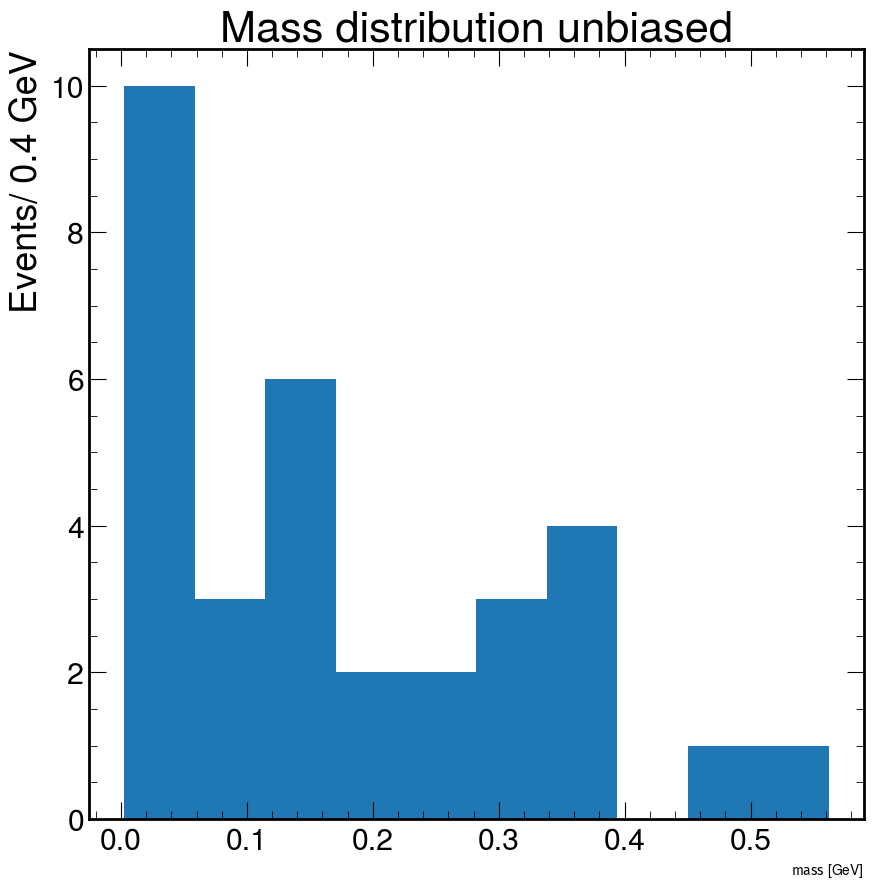

In [17]:
plt.hist(np.squeeze(dr))
plt.title("Mass distribution unbiased")
plt.xlabel(r'$\mathrm{mass}$ [GeV]', size=10)
plt.ylabel("Events/ 0.4 GeV")


In [13]:
mass

array([8.00002575, 8.00002575, 8.0000658 , 8.0000658 , 8.0000658 ,
       8.00000381, 8.00002003, 8.00002003, 8.00003338, 8.00003338,
       8.00008297, 8.00008297, 8.00006866, 8.00006866, 8.00006485,
       7.99998283, 7.99998283, 8.00009346, 8.00009346, 8.00005531,
       7.99993563, 7.99993563, 7.99993563, 7.99993563, 8.00005054,
       8.00005054, 8.00005054, 8.00005054, 7.99996376, 7.99996376,
       8.00003624, 8.00003624])